# WEEK 6 ASSIGNMENT: EXPLORING EARTHQUAKE DATA

### In this assignment, you will explore data collected on earthquakes of magnitude > 4.5 that occurred globally from 1 Sept 2024 through 1 Sept 2025 using some basic tools in Pandas!

Want to know more about earthquakes? Check out: https://www.bgs.ac.uk/discovering-geology/earth-hazards/earthquakes/ 

(USGS earthquake scientific resources website is giving me 'bad gateway' error this morning, but this the above is also an excellent resource!)

In [1]:
# import needed modules 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#### (0)  ******YOU'LL USE THE DATA I UPLOADED TO CANVAS, TO ENSURE WE ALL GET THE SAME ANSWERS (THIS DATABASE IS CONSTANTLY BEING RETROACTIVELY UPDATED)******
#### BUT HERE'S HOW I DOWNLOADED IT, AUTOMATICALLY, IN CASE YOU'RE CURIOUS!
- I used an API on the USGS earthquakes database site!
<br><br>
-  How did I determine how to use this API to download earthquake data for specific parameters?
   - See here for instructions + examples:
https://earthquake.usgs.gov/fdsnws/event/1/
<br><br>
- We want earthquakes:
   - anywhere on globe
   - of at least mangitude 4.5
   - from 0 UTC on Sept 1, 2024 to 0 UTC on Sept 1, 2025
   - ordered by time, with most recent first
   - downloaded as a CSV-formatted database
<br><br>
- Review the code I give you below for this and prove to yourself that all that information is woven within there!

In [ ]:
# Automated way to download earthquake data!

#  DO NOT USE THIS METHOD FOR THIS ASSIGNMENT THOUGH!!!

# As this database is continuously retroactively updated and you may not match my 'sanity checks'

#import urllib.request # module for downloading data from URLs, may need to install
#url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2024-9-1&endtime=2025-9-1&minmagnitude=4.5&orderby=time'
#urllib.request.urlretrieve(url,'query_current.csv')

## PLEASE USE THE DATA I INCLUDED W/ THIS ASSIGNMENT ON MOODLE AS THIS IS A RETROACTIVELY UPDATING DATASET

#### (1)  Read in data into a Pandas DataFrame
- don't specify an index column, allow Pandas to default to creating its own- the time strings are messy and you haven't learned yet how to deal with them!

In [7]:
df = pd.read_csv('query_0924_0925.csv', usecols=['time','latitude','longitude','depth','mag','place'])

#### (2)  In doing (1) note that: we are only interested in the following variables (columns), so either only read in these variables, or read in all variables and subsequently drop the other columns, and confirm that you have done successfully 
   - time
   - latitude
   - longitude
   - depth
   - mag (magnitude of earthquake - strength)
   - place

In [ ]:
# Read in desired columns in (1)
df

,time,latitude,longitude,depth,mag,place
0,2025-08-31T23:46:27.869Z,34.7164,70.7355,8.457,5.2,"41 km NE of Jalālābād, Afghanistan"
1,2025-08-31T23:04:27.436Z,-8.1787,107.4313,10.000,4.5,"108 km S of Banjar, Indonesia"
2,2025-08-31T21:41:06.604Z,34.7560,70.6969,10.000,4.5,"42 km NNE of Jalālābād, Afghanistan"
3,2025-08-31T21:39:55.643Z,11.8039,141.3984,35.000,4.5,"245 km NNE of Fais, Micronesia"
4,2025-08-31T21:33:20.052Z,34.7363,70.7649,10.000,5.2,"38 km WSW of Asadābād, Afghanistan"
...,...,...,...,...,...,...
7868,2024-09-01T03:42:49.557Z,8.1965,91.7229,10.000,5.2,"Nicobar Islands, India region"
7869,2024-09-01T02:28:41.780Z,35.5031,138.9388,37.932,4.6,"8 km ENE of Oshino, Japan"
7870,2024-09-01T01:55:06.334Z,-10.4092,66.4220,10.000,4.6,Mid-Indian Ridge
7871,2024-09-01T00:53:14.857Z,-57.9294,-25.6883,39.749,5.4,South Sandwich Islands region


#### (3) Print the first five and last five rows to get a sense of your data 

In [ ]:
# First 5
print(df.head())

# Last 5
print(df.tail())

                       time  latitude  longitude   depth  mag  \
0  2025-08-31T23:46:27.869Z   34.7164    70.7355   8.457  5.2   
1  2025-08-31T23:04:27.436Z   -8.1787   107.4313  10.000  4.5   
2  2025-08-31T21:41:06.604Z   34.7560    70.6969  10.000  4.5   
3  2025-08-31T21:39:55.643Z   11.8039   141.3984  35.000  4.5   
4  2025-08-31T21:33:20.052Z   34.7363    70.7649  10.000  5.2   

                                 place  
0   41 km NE of Jalālābād, Afghanistan  
1        108 km S of Banjar, Indonesia  
2  42 km NNE of Jalālābād, Afghanistan  
3       245 km NNE of Fais, Micronesia  
4   38 km WSW of Asadābād, Afghanistan  
                          time  latitude  longitude   depth  mag  \
7868  2024-09-01T03:42:49.557Z    8.1965    91.7229  10.000  5.2   
7869  2024-09-01T02:28:41.780Z   35.5031   138.9388  37.932  4.6   
7870  2024-09-01T01:55:06.334Z  -10.4092    66.4220  10.000  4.6   
7871  2024-09-01T00:53:14.857Z  -57.9294   -25.6883  39.749  5.4   
7872  2024-09-01T00:49:

#### (4)  Access just the time and depth columns (for all rows), using Pandas indexing

In [9]:
df[['time','depth']]

,time,depth
0,2025-08-31T23:46:27.869Z,8.457
1,2025-08-31T23:04:27.436Z,10.000
2,2025-08-31T21:41:06.604Z,10.000
3,2025-08-31T21:39:55.643Z,35.000
4,2025-08-31T21:33:20.052Z,10.000
...,...,...
7868,2024-09-01T03:42:49.557Z,10.000
7869,2024-09-01T02:28:41.780Z,37.932
7870,2024-09-01T01:55:06.334Z,10.000
7871,2024-09-01T00:53:14.857Z,39.749


#### (5) How many rows of observations are there in your DataFrame?

In [ ]:
# Sanity check: 7873 earthquakes

print('Rows of obs:', len(df))

Rows of obs: 7873


#### (6)  What is the time/date of the most recent earthquake? While you could manually use the results of things you've printed earlier for this..... you MUST actually access this observation using Pandas indexing!!!

In [ ]:
print('Most recent quake:', df.loc[df['time'].idxmax()]['time'])

Most recent quake: 2025-08-31T23:46:27.869Z


#### (7) Are there any NaNs?  If so, properly deal with them.

In [ ]:
df.isna().sum()
# Yes, there are but only in the place column.

time           0
latitude       0
longitude      0
depth          0
mag            0
place        116
dtype: int64

In [23]:
df = df.dropna()
df.isna().sum()

time         0
latitude     0
longitude    0
depth        0
mag          0
place        0
dtype: int64

#### (8) Using a single function, calculate basic statistics for each column (each variable)

In [25]:
df.describe()

,latitude,longitude,depth,mag
count,7757.000000,7757.000000,7757.000000,7757.000000
mean,6.871369,56.525190,56.134013,4.806554
std,32.883875,118.116219,103.862997,0.364322
min,-73.220400,-179.976200,0.000000,4.500000
25%,-17.643400,-36.010000,10.000000,4.500000
50%,3.561300,122.087400,10.000000,4.700000
75%,36.592400,153.015400,53.364000,4.900000
max,87.081500,179.988900,648.298000,8.800000


#### (9) What are the magnitudes of the seven strongest earthquakes in this dataset?

In [31]:
# Sanity check: ranging from magnitude 8.8 to 7.3 (you need to evaluate all 7 magnitudes though)

print('7 strongest quakes:', df['mag'].nlargest(7).values)

7 strongest quakes: [8.8 7.7 7.6 7.5 7.4 7.4 7.3]


#### (10)  Create a scatterplot of earthquake depth vs. magnitude. 
 - remember, there is built-in Pandas plotting functionality!
 - you must include axis labels and title 
 - need units for depth? check out the metadata I linked you to above 

<Axes: title={'center': 'Earthquake Depth vs. Magnitude'}, xlabel='Depth (km)', ylabel='Magnitude'>

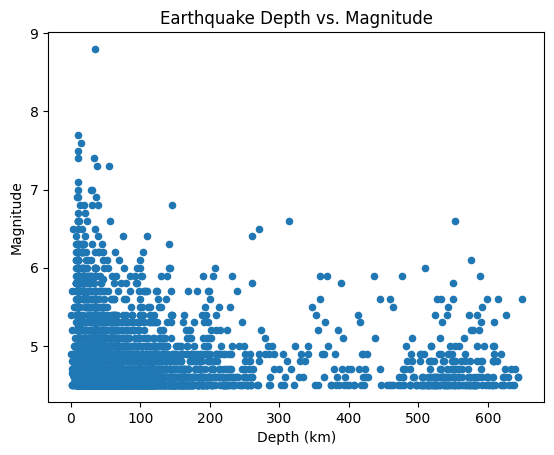

In [36]:
df.plot(kind='scatter', 
        x='depth', 
        y='mag', 
        title='Earthquake Depth vs. Magnitude',
        xlabel='Depth (km)',
        ylabel='Magnitude')

#### (11) Discuss, in a few sentences, any patterns you notice in your earthquake depth and magnitude scatter plot.  Please be specific.

From depths of 0-300 km, earthquake magnitude generally appears to decrease with increased depth. Most earthquakes appear to occur in these depths as well, as evidenced by the highest clustering of points between 0-300km. However, there is also a signifcant clustering of points in the ~500-600km depth range, though the magnitudes of these quakes appear to be on the weaker end. 

#### (12)  Create a histogram of earthquake depth!  First, you'll want to evaluate the range of values so that you wisely pick the number of bins you'll want. You might need to experiment with this a bit!

Text(0, 0.5, 'Frequency (Events)')

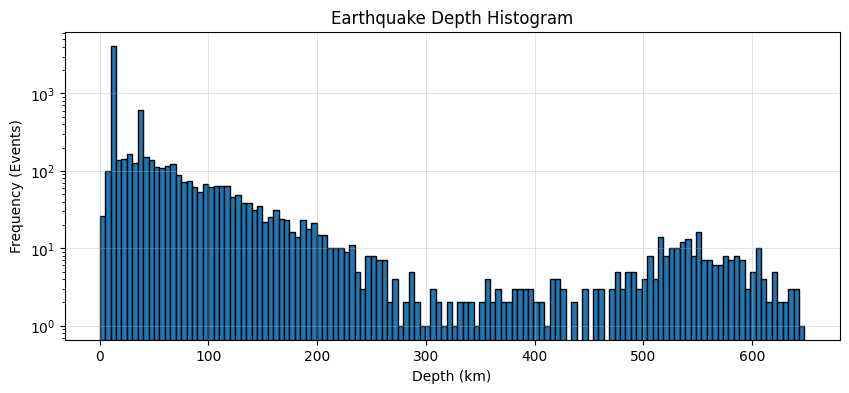

In [52]:
fig,ax = plt.subplots(figsize=(10, 4))
ax.hist(df['depth'], bins=130, edgecolor='black', log=True) # Set y-axis to be logarithmic to make lower freq more visible
ax.grid(alpha=0.5, linewidth=0.5)
ax.set_title('Earthquake Depth Histogram')
ax.set_xlabel('Depth (km)')
ax.set_ylabel('Frequency (Events)')

#### (13)  From your histogram in (12), please estimate the most common depth.  Be as specific as possible!

The most common depth appears to be between 10-15km. The maximum depth is 648km, so I split up the histogram into 130 bins, so each bin would account for about 5km of depth. The highest bar in the plot is the third one from the right, which would be for depths of 10-15km. 